# Dictionary Based Sentiment Analysis

In [1]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [3]:
# nltk.download('opinion_lexicon') #Download Opinion Dictionary
positive_wds = set(opinion_lexicon.positive())
negative_wds = set(opinion_lexicon.negative())

In [4]:
positive_wds

{'vibrantly',
 'fortunate',
 'immaculate',
 'speedily',
 'calmness',
 'regal',
 'counter-attack',
 'witty',
 'encourage',
 'erudite',
 'patiently',
 'soundness',
 'patience',
 'trumpet',
 'unparalleled',
 'relish',
 'simplifies',
 'advantage',
 'reconciliation',
 'wisely',
 'miraculousness',
 'cuteness',
 'delicacy',
 'envious',
 'heartily',
 'clever',
 'preferring',
 'easygoing',
 'redeem',
 'romantic',
 'brilliant',
 'sensationally',
 'famed',
 'righteous',
 'realizable',
 'savvy',
 'punctual',
 'resolute',
 'gleeful',
 'subsidizes',
 'dependably',
 'approval',
 'greatest',
 'fine-looking',
 'important',
 'worthwhile',
 'ecenomical',
 'foresight',
 'obsessions',
 'pep',
 'fecilitous',
 'trendy',
 'outshone',
 'tempt',
 'awesome',
 'worth-while',
 'modern',
 'dexterously',
 'vivacious',
 'irresistible',
 'devout',
 'cleanly',
 'clearly',
 'fans',
 'integrated',
 'hottest',
 'carefree',
 'prospros',
 'encouragement',
 'substantive',
 'fortuitous',
 'suave',
 'adroit',
 'zippy',
 'excit

In [5]:
negative_wds

{'frighteningly',
 'lying',
 'disgustedly',
 'craps',
 'awfulness',
 'brainless',
 'deceiving',
 'partisan',
 'cravenly',
 'mortify',
 'outcast',
 'deride',
 'weariness',
 'flaunt',
 'vex',
 'treasonous',
 'instigators',
 'irresolute',
 'inconsequentially',
 'unsettle',
 'comical',
 'unreliability',
 'hysterics',
 'despicably',
 'notoriety',
 'disrespectablity',
 'drawback',
 'imperfection',
 'corruptted',
 'agony',
 'barbarity',
 'damn',
 'repudiation',
 'spook',
 'downhearted',
 'remorselessness',
 'dilly-dally',
 'fall',
 'bane',
 'inconsistence',
 'rebuff',
 'debatable',
 'desiccate',
 'tetchily',
 'abrupt',
 'crashed',
 'gibber',
 'unrest',
 'demean',
 'frustrate',
 'bristle',
 'crooks',
 'destitution',
 'heckles',
 'hurtful',
 'warped',
 'bearish',
 'eyesore',
 'envious',
 'disproportionate',
 'dent',
 'weakening',
 'accost',
 'harsh',
 'nightmarishly',
 'spotty',
 'exorbitantance',
 'daze',
 'disgusting',
 'regressive',
 'infested',
 'dishonorablely',
 'dissonantly',
 'ill-defin

In [11]:
type(positive_wds)

set

### Testing for positive

In [7]:
'good' in positive_wds

True

In [8]:
'good' in negative_wds

False

### Testing for negative

In [9]:
'bad' in positive_wds

False

In [10]:
'bad' in negative_wds

True

In [12]:
def score_sent(sent):
    """Returns a score btw -1 and 1"""
    # Converting to lower
    sent = sent.lower()
    
    # Concerting to words
    words = word_tokenize(sent)
    
    total = len(words)
    
    temp = []
    for i in words:
        if i in positive_wds:
            temp.append(1)
        elif i in negative_wds:
            temp.append(-1)
            
        else:
            temp.append(0)
           
    score = sum(temp) / len(temp)
    return score


In [13]:
score_sent('This is a happy sentence, i am in a good mood today')

0.15384615384615385

In [14]:
score_sent('This is a sad sentence, i am in a bad mood today')

-0.15384615384615385

In [15]:
score_sent('This is a sad sentence, i am not in a good mood today')

0.0

### Importing my dataset

In [37]:
import pandas as pd
df = pd.read_csv('ecommerceDataset.csv',header=None, names=['Category','Text'])
df.head()

Category                                               Text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...

In [38]:
df_sample = df.sample(frac=0.1)

In [39]:
df_sample

Category  \
49047             Electronics   
14961               Household   
47794             Electronics   
11683               Household   
5794                Household   
...                       ...   
25943                   Books   
1010                Household   
28089                   Books   
33776  Clothing & Accessories   
40943             Electronics   

                                                    Text  
49047  3M Small Car Care Kit Day in day out your car ...  
14961  Whirlpool 245 L 2 Star Frost Free Double Door ...  
47794  US1984 2018 New Universal 360 Headrest Dual Mo...  
11683  2 Spoon Stainless Steel Egg Beater Lassi/Butte...  
5794   Martha Stewart Collection Radiant Day 9-Pc Que...  
...                                                  ...  
25943  Endurance: The True Story of Shackleton's Incr...  
1010   Invezo Impression Polyester Portable Gazebo Te...  
28089           Copy Colour: Fruits (Copy Colour Books)   
33776  VIMAL Cotton Blended Trackpant for Girls Brigh...  
40943  Samsung DDR3 4GB 1333MHz DDR3-1333, M378B5273D...  

[5042 rows x 2 columns]

In [40]:
# Our data cleaning function

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialising
lemmatizer = WordNetLemmatizer()

stop_words = stopwords.words("english")

def datacleaning(mystring):
    # Step 1 
    # Tokenize the string
    try:
        my_tokenized_string = word_tokenize(mystring)
        
        # ----------------- End of step 1 ----------------- #
        
        temp = []
        for i in my_tokenized_string:
    #         print(f'i right now is ({i})')
            i = i.lower()
            if i in stop_words or not(i.isalpha()):
                pass
            else:
                # Appending a word that is not a stopword and lemmatizing the same at the same time
                temp.append(lemmatizer.lemmatize(i))
    
        my_new_string = ' '.join(temp)
        return my_new_string
    except:
        return ''

### Applying our data cleaning function

In [41]:
df_sample['Text_clean'] = df_sample['Text'].apply(datacleaning)

In [42]:
df_sample

Category  \
49047             Electronics   
14961               Household   
47794             Electronics   
11683               Household   
5794                Household   
...                       ...   
25943                   Books   
1010                Household   
28089                   Books   
33776  Clothing & Accessories   
40943             Electronics   

                                                    Text  \
49047  3M Small Car Care Kit Day in day out your car ...   
14961  Whirlpool 245 L 2 Star Frost Free Double Door ...   
47794  US1984 2018 New Universal 360 Headrest Dual Mo...   
11683  2 Spoon Stainless Steel Egg Beater Lassi/Butte...   
5794   Martha Stewart Collection Radiant Day 9-Pc Que...   
...                                                  ...   
25943  Endurance: The True Story of Shackleton's Incr...   
1010   Invezo Impression Polyester Portable Gazebo Te...   
28089           Copy Colour: Fruits (Copy Colour Books)    
33776  VIMAL Cotton Blended Trackpant for Girls Brigh...   
40943  Samsung DDR3 4GB 1333MHz DDR3-1333, M378B5273D...   

                                              Text_clean  
49047  small car care kit day day car move dusty stre...  
14961  whirlpool l star frost free double door refrig...  
47794  new universal headrest dual mount car stand ho...  
11683  spoon stainless steel egg beater milk hand ble...  
5794   martha stewart collection radiant day queen co...  
...                                                  ...  
25943  endurance true story shackleton incredible voy...  
1010   invezo impression polyester portable gazebo te...  
28089                 copy colour fruit copy colour book  
33776  vimal cotton blended trackpant girl bright tre...  
40943  samsung samsung udimm manufacturer reference u...  

[5042 rows x 3 columns]

In [22]:
df_sample['Sentiment_score'] = df_sample['Text_clean'].apply(score_sent)

In [23]:
df_sample

Category  \
39982             Electronics   
27938                   Books   
14678               Household   
42424             Electronics   
41310             Electronics   
...                       ...   
34037  Clothing & Accessories   
23014                   Books   
49183             Electronics   
40406             Electronics   
28637                   Books   

                                                    Text  \
39982  Pruthvik Gold Plated Display Port Male to HDMI...   
27938  Black Holes: The Reith Lectures Review "Master...   
14678  BPL 12 Place Settings Dishwasher (D812S27A, Si...   
42424  Rolltop Desktop Computer CPU, Intel CORE 2 Duo...   
41310  Lata || NEEM - Datun|Twig|Datwan|Stick || 50 p...   
...                                                  ...   
34037  Skytouch Mens Suspender Belt & Bow (Skytouch _...   
23014  Essays for Civil  and Judicial Services Examin...   
49183  Portronics Car Power 4 POR-761 Car Charger wit...   
40406  SteelSeries Rival 310 Gaming Mouse Rival 310 d...   
28637  The Water Of Life: A Treatise on Urine Therapy...   

                                              Text_clean  Sentiment_score  
39982  pruthvik gold plated display port male hdmi fe...         0.058824  
27938  black hole reith lecture review master univers...         0.110000  
14678  bpl place setting dishwasher silver sturdy sil...         0.131579  
42424  rolltop desktop computer cpu intel core duo gh...         0.051613  
41310  lata neem pc neem tooth cleaning nature herbal...        -0.012500  
...                                                  ...              ...  
34037  skytouch men suspender belt bow skytouch give ...         0.090909  
23014           essay civil judicial service examination         0.000000  
49183  portronics car power car charger usb port blac...         0.100671  
40406  steelseries rival gaming mouse rival delivers ...         0.020408  
28637  water life treatise urine therapy book descrip...         0.040816  

[5042 rows x 4 columns]

# Loading Word2Vec

In [1]:
import gensim
from gensim.models import Word2Vec

In [2]:
path = '/home/infinity/siddharth/github_content/non_github/model/GoogleNews-vectors-negative300.bin.gz'

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format(path, binary=True) 

In [4]:
model

### Getting my vectors

In [8]:
model['queen']

array([ 0.00524902, -0.14355469, -0.06933594,  0.12353516,  0.13183594,
       -0.08886719, -0.07128906, -0.21679688, -0.19726562,  0.05566406,
       -0.07568359, -0.38085938,  0.10400391, -0.00081635,  0.1328125 ,
        0.11279297,  0.07275391, -0.046875  ,  0.06591797,  0.09423828,
        0.19042969,  0.13671875, -0.23632812, -0.11865234,  0.06542969,
       -0.05322266, -0.30859375,  0.09179688,  0.18847656, -0.16699219,
       -0.15625   , -0.13085938, -0.08251953,  0.21289062, -0.35546875,
       -0.13183594,  0.09619141,  0.26367188, -0.09472656,  0.18359375,
        0.10693359, -0.41601562,  0.26953125, -0.02770996,  0.17578125,
       -0.11279297, -0.00411987,  0.14550781,  0.15625   ,  0.26757812,
       -0.01794434,  0.09863281,  0.05297852, -0.03125   , -0.16308594,
       -0.05810547, -0.34375   , -0.17285156,  0.11425781, -0.09033203,
        0.13476562,  0.27929688, -0.04980469,  0.12988281,  0.17578125,
       -0.22167969, -0.01190186,  0.140625  , -0.18164062,  0.11

In [9]:
model['king']

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [21]:
# import required libraries
import numpy as np
from numpy.linalg import norm
 
temp_a = model['hi']
temp_b = model['health']

# compute cosine similarity
cosine = np.dot(temp_a,temp_b)/(norm(temp_a)*norm(temp_b))
print("Cosine Similarity:", cosine)

Cosine Similarity: 0.40021235


In [31]:
# model['Hi, my name is sam']

# Think logically
# Get the sentence/document bla bla
# Break it down into words
# Get vectors for the words
# Store them all
# Get the average all the vectors 
# Make a function out of it 

In [44]:
from nltk.tokenize import word_tokenize


def vectorizer(x):
    # Get your text
    # Tokenizing (break your text into words)
    my_tokenized_string = word_tokenize(x)

    # ----------------- End of step 1 ----------------- #    
    word_vectors = []
    # Loop over your words 1 by 1
    for i in my_tokenized_string:
        try:
            # Getting the vector for your words 
            word_vectors.append(model[i])
        except:
            pass
    
    if len(word_vectors) > 0:    
        # Got my vectors for each word, now to take an average 
        np_word_vectors = np.array(word_vectors)
        # Calculating the mean
        np_word_vectors = np_word_vectors.mean(axis = 0)
    else:
        np_word_vectors = np.zeros(300)
    
    return np_word_vectors

In [ ]:
'Hi, my name is jahsgdfkjuashdgf'

In [47]:
vectorizer('654654654654')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [48]:
df_sample

Category  \
49047             Electronics   
14961               Household   
47794             Electronics   
11683               Household   
5794                Household   
...                       ...   
25943                   Books   
1010                Household   
28089                   Books   
33776  Clothing & Accessories   
40943             Electronics   

                                                    Text  \
49047  3M Small Car Care Kit Day in day out your car ...   
14961  Whirlpool 245 L 2 Star Frost Free Double Door ...   
47794  US1984 2018 New Universal 360 Headrest Dual Mo...   
11683  2 Spoon Stainless Steel Egg Beater Lassi/Butte...   
5794   Martha Stewart Collection Radiant Day 9-Pc Que...   
...                                                  ...   
25943  Endurance: The True Story of Shackleton's Incr...   
1010   Invezo Impression Polyester Portable Gazebo Te...   
28089           Copy Colour: Fruits (Copy Colour Books)    
33776  VIMAL Cotton Blended Trackpant for Girls Brigh...   
40943  Samsung DDR3 4GB 1333MHz DDR3-1333, M378B5273D...   

                                              Text_clean  
49047  small car care kit day day car move dusty stre...  
14961  whirlpool l star frost free double door refrig...  
47794  new universal headrest dual mount car stand ho...  
11683  spoon stainless steel egg beater milk hand ble...  
5794   martha stewart collection radiant day queen co...  
...                                                  ...  
25943  endurance true story shackleton incredible voy...  
1010   invezo impression polyester portable gazebo te...  
28089                 copy colour fruit copy colour book  
33776  vimal cotton blended trackpant girl bright tre...  
40943  samsung samsung udimm manufacturer reference u...  

[5042 rows x 3 columns]

### Next Steps 
- Use Word2Vec to get vectors for our dataframe
- Train a ML model on those said vectors
- Look at output and measure accuracy

### Let's get our vectors 

In [50]:
vectors = []

for i in df_sample['Text_clean']:
    vectors.append(vectorizer(i))

### I want to convert this to a numpy array

In [51]:
np_vectors = np.asarray(vectors)
np_vectors

array([[ 0.02007261,  0.06641173, -0.00526959, ...,  0.07397937,
        -0.01446716,  0.00707618],
       [-0.04604248,  0.0604834 ,  0.02838257, ...,  0.02729919,
         0.02837799,  0.00751892],
       [-0.00344909, -0.04639073, -0.03285699, ..., -0.03968824,
        -0.04914501, -0.03517308],
       ...,
       [ 0.06707764,  0.01641846, -0.01708984, ...,  0.07897949,
        -0.1043396 ,  0.19036102],
       [ 0.00218043,  0.06905076, -0.04239365, ...,  0.00361896,
         0.04389401,  0.01619983],
       [-0.08951569, -0.06246948,  0.09426117, ..., -0.03678894,
        -0.12591553, -0.06231022]])

In [54]:
df_sample.shape

(5042, 3)

In [53]:
len(np_vectors)

5042

### Success !!!!!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPHjEpWrvPHhCEbpKITeYzvsOckRo44kCXguLy9hvx1g&s)

Vectors Done

### Now, time to train a model

In [55]:
df_sample

Category  \
49047             Electronics   
14961               Household   
47794             Electronics   
11683               Household   
5794                Household   
...                       ...   
25943                   Books   
1010                Household   
28089                   Books   
33776  Clothing & Accessories   
40943             Electronics   

                                                    Text  \
49047  3M Small Car Care Kit Day in day out your car ...   
14961  Whirlpool 245 L 2 Star Frost Free Double Door ...   
47794  US1984 2018 New Universal 360 Headrest Dual Mo...   
11683  2 Spoon Stainless Steel Egg Beater Lassi/Butte...   
5794   Martha Stewart Collection Radiant Day 9-Pc Que...   
...                                                  ...   
25943  Endurance: The True Story of Shackleton's Incr...   
1010   Invezo Impression Polyester Portable Gazebo Te...   
28089           Copy Colour: Fruits (Copy Colour Books)    
33776  VIMAL Cotton Blended Trackpant for Girls Brigh...   
40943  Samsung DDR3 4GB 1333MHz DDR3-1333, M378B5273D...   

                                              Text_clean  
49047  small car care kit day day car move dusty stre...  
14961  whirlpool l star frost free double door refrig...  
47794  new universal headrest dual mount car stand ho...  
11683  spoon stainless steel egg beater milk hand ble...  
5794   martha stewart collection radiant day queen co...  
...                                                  ...  
25943  endurance true story shackleton incredible voy...  
1010   invezo impression polyester portable gazebo te...  
28089                 copy colour fruit copy colour book  
33776  vimal cotton blended trackpant girl bright tre...  
40943  samsung samsung udimm manufacturer reference u...  

[5042 rows x 3 columns]

In [56]:
df_sample['Category'].value_counts()

Category
Household                 1961
Books                     1179
Electronics               1053
Clothing & Accessories     849
Name: count, dtype: int64

### I will have to label encode

In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialise
le = LabelEncoder()

In [59]:
# Fit the said model
le.fit(df_sample['Category'])

LabelEncoder()

In [60]:
labels = le.transform(df_sample['Category'])

In [61]:
labels

array([2, 3, 2, ..., 0, 1, 2])

My, X is ready. So is my Y.

### Now, let's train a model

In [62]:
from sklearn.linear_model import LogisticRegression

In [64]:
# Initialising
lr = LogisticRegression()

In [65]:
#Fitting the model for Bag of words
lr.fit(np_vectors,labels)

LogisticRegression()

### Training done. Let's get some predictions

In [66]:
#Predicting the model for bag of words
lr.predict(np_vectors)

array([3, 3, 2, ..., 0, 1, 2])

In [67]:
# Store the same 
lr_model_predicted = lr.predict(np_vectors)

In [68]:
lr_model_predicted

array([3, 3, 2, ..., 0, 1, 2])

In [69]:
labels

array([2, 3, 2, ..., 0, 1, 2])

### Calculating Accuracy

In [70]:
#Accuracy score for bag of words
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(labels,lr_model_predicted)

0.9434748115827053

### But wait, there's more

In [72]:
from sklearn.metrics import confusion_matrix
cm_model = confusion_matrix(labels,lr_model_predicted)

In [73]:
cm_model

array([[1113,    7,   13,   46],
       [   4,  810,    6,   29],
       [  19,    4,  955,   75],
       [  19,   22,   41, 1879]])

### Visualising the same

<Axes: >

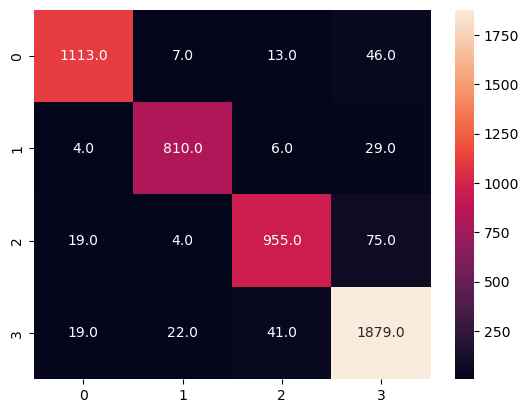

In [74]:
import seaborn as sns
sns.heatmap(cm_model, annot=True, fmt=".1f")

### Now, let's see this in practice

In [88]:
# Let's write some text
ourtext = 'My room looks amazing, i put on some new bed sheets'

### What do we do here
- We clean it
- We Vectorize it
- We give those vectors to our model
- The model will give us label encoded output
- We use the label encoder to get the orignal labels 

In [90]:
# Data Cleaning 
ourtext = datacleaning(ourtext)
ourtext

'room look amazing put new bed sheet'

In [92]:
# Vectorizing 
# vectorizer(ourtext)
our_vector = vectorizer(ourtext)

In [94]:
# Giving the vector to our model
lr.predict([our_vector])

array([3])

In [96]:
# We want to go from label encoder to orignal labels 
le.inverse_transform(lr.predict([our_vector]))

array(['Household'], dtype=object)